In [15]:
y_test=[3,2,6,8,10,5,24,11,4,16]
y_pred=[2,6,3,6,11,7,18,9,5,15]

import numpy as np

from sklearn.metrics import mean_absolute_error
print('mae= ',mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_absolute_percentage_error
print('mape= %.1f'%mean_absolute_percentage_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error
print('mse= ',mean_squared_error(y_test, y_pred))
print('rmse= %.1f'%np.sqrt(mean_squared_error(y_test, y_pred)))
#print('msle= %.1f'%np.log(mean_squared_error(y_test, y_pred)))  텍스트북에 나왔으나 공식 맞지 않음

from sklearn.metrics import mean_squared_log_error
print('msle= %.1f'%mean_squared_log_error(y_test, y_pred))

from sklearn.metrics import r2_score
print('R_sqrt = %.1f' %r2_score(y_test,y_pred))

mae=  2.3
mape= 0.4
mse=  7.7
rmse= 2.8
msle= 0.1
R_sqrt = 0.8


accuracy= 65.0%
confusion matrix: 
 [[5 3]
 [4 8]]
precision= 72.7%
recall= 66.7%
f1= 69.6%


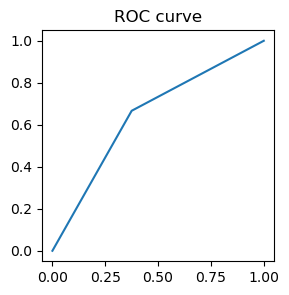

auc= 0.6


In [41]:
y_test=[1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,1,0,1]
y_pred=[1,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,1]

from sklearn.metrics import accuracy_score
print('accuracy= %.1f%%'% (accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import confusion_matrix
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))

from sklearn.metrics import precision_score
print('precision= %.1f%%'% (precision_score(y_test, y_pred)*100))

from sklearn.metrics import recall_score
print('recall= %.1f%%'% (recall_score(y_test, y_pred)*100))

from sklearn.metrics import f1_score
print('f1= %.1f%%'% (f1_score(y_test, y_pred)*100))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label=1)

import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(3,3))
axe.plot(fpr,tpr)
axe.set_title('ROC curve')
plt.show()

print('auc= %.1f' %auc(fpr,tpr))

In [44]:
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df, price = datasets.fetch_openml('boston', return_X_y=True)

df['Price'] = price
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [46]:
df.shape

(506, 14)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [48]:
df['RAD']=df['RAD'].astype('int')

In [49]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

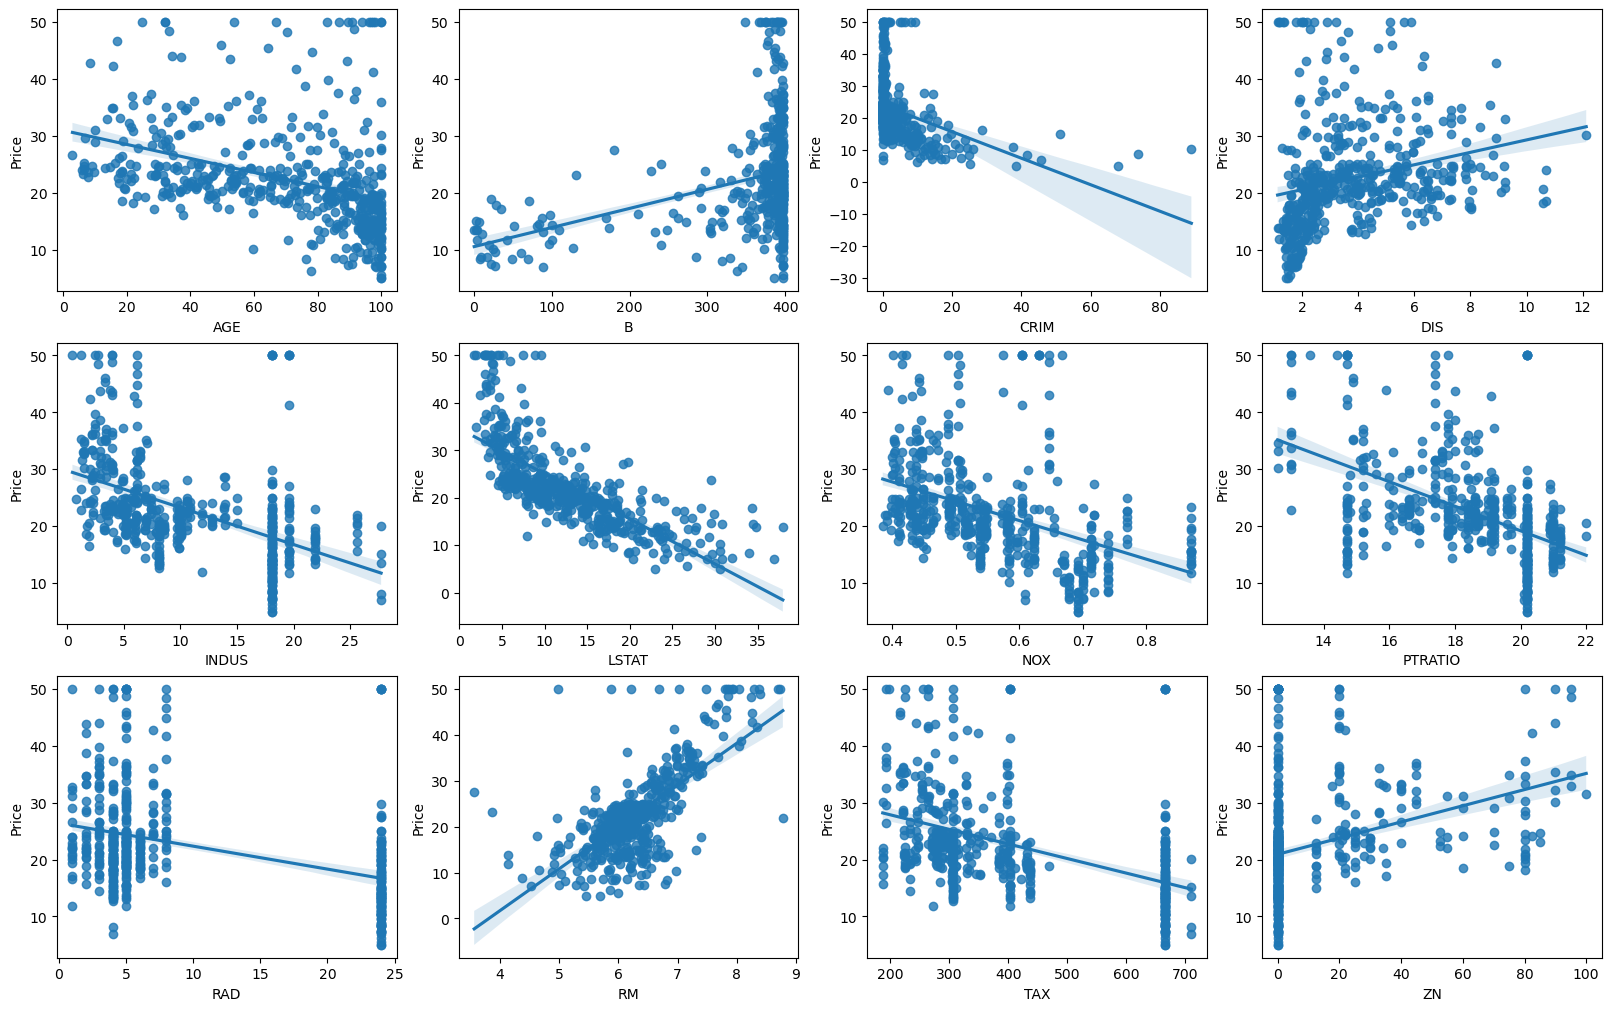

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots (figsize=(16,10), ncols=4, nrows=3,constrained_layout=True)
features = df.columns.difference(['Price', 'CHAS'])

for i, feature in zip(range(12), features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature,y=df['Price'], data=df, ax=axs[row][col])

In [81]:
from sklearn.model_selection import train_test_split

x = np.hstack([df.loc[:,'CRIM':'INDUS'].values,df.loc[:,'NOX':'LSTAT'].values])
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=42)

print("Train set Price mean: ", y_train.mean())
print("Test set Price mean: ", y_test.mean())

Train set Price mean:  22.796534653465343
Test set Price mean:  21.488235294117644


In [82]:
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()

x_train_scaled = MMscaler.fit_transform(x_train)

In [83]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

pred_train = linear.predict(x_train_scaled)

print('mae= %.5f' %mean_absolute_error(y_train, pred_train))
print('mae= %.5f' %mean_squared_error(y_train, pred_train))
print('rmse= %.5f' %np.sqrt(mean_squared_error(y_train, pred_train)))
print('r2= %.2f' %r2_score(y_train, pred_train))

mae= 3.32616
mae= 22.11246
rmse= 4.70239
r2= 0.75


In [86]:
x_test_scaled = MMscaler.transform(x_test) 
    # train set에 fit을 시켜 놓았으므로, test set은 fit_transform이 아닌 transform만!
pred = linear.predict(x_test_scaled)

In [87]:
print('mae= %.5f' %mean_absolute_error(y_test, pred))
print('mae= %.5f' %mean_squared_error(y_test, pred))
print('rmse= %.5f' %np.sqrt(mean_squared_error(y_test, pred)))
print('r2= %.2f' %r2_score(y_test, pred))

mae= 3.23724
mae= 24.63539
rmse= 4.96341
r2= 0.66


In [92]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_dt = iris.data
iris_label = iris.target

df = pd.DataFrame (data=iris_dt, columns = iris.feature_names)
df['label'] = iris_label

df.head()
df['label'].unique()
df.shape

(150, 5)

In [93]:
x_train, x_test, y_train, y_test = \
train_test_split (iris_dt, iris_label, test_size=0.2, random_state=0, stratify=iris_label)

df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier (max_depth=5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier (max_depth=3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier (max_depth=1, random_state=100)

In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score (dtree_clf_5, x_train, y_train, scoring = 'accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차검증 정확도:  [0.917 1.    0.917 1.    1.    0.833 1.    0.917 1.    0.833]
평균 검증 정확도:  0.9417


In [96]:
scores = cross_val_score (dtree_clf_3, x_train, y_train, scoring = 'accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차검증 정확도:  [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균 검증 정확도:  0.925


In [97]:
scores = cross_val_score (dtree_clf_1, x_train, y_train, scoring = 'accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도:  0.6667


In [100]:
dtree_clf_5.fit(x_train, y_train)
pred = dtree_clf_5.predict(x_test)

print('Accuracy = %.5f' %accuracy_score(y_test, pred))

Accuracy = 0.96667
